# Figure S10
Create maps of correlation intermodel spread of net EPT trends and intermodel pread of each surface flux and circulation

In [16]:
import os
import xarray as xr
import xskillscore as xscore
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import matplotlib

# Change current working directory
os.chdir('/home/espinosa10/tropical_pacific_clouds')

In [29]:
xr.open_dataset("/home/espinosa10/tropical_pacific_clouds/data/piControl/tauu_mon_1850-2100_CMIP6_piControl.nc")

<xarray.Dataset>
Dimensions:  (time: 1800, lat: 72, lon: 144, model: 56)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 1999-12-01
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * model    (model) object 'E3SM-1-1' 'E3SM-1-0' ... 'NorESM2-MM'
Data variables:
    tauu     (model, time, lat, lon) float32 ...

In [17]:
seb_cmip_1sig = xr.open_dataset("data/piControl/SEB_CMIP_1sig_model.nc")
seb_cmip_1sig_ept = xr.open_dataset("data/piControl/SEB_CMIP_EPT_STD.nc")

In [25]:
r_maps_1sig = []
p_maps_1sig = []
for var in seb_cmip_1sig:
    r = xscore.pearson_r(seb_cmip_1sig_ept['NET'], seb_cmip_1sig[var], dim='model')
    p = xscore.pearson_r_p_value(seb_cmip_1sig_ept['NET'], seb_cmip_1sig[var], dim='model')
    r_maps_1sig.append(r)
    p_maps_1sig.append(p)

r_maps_1sig = xr.concat(r_maps_1sig, dim=seb_cmip_1sig.data_vars)
p_maps_1sig = xr.concat(p_maps_1sig, dim=seb_cmip_1sig.data_vars)
r_maps_1sig

<xarray.DataArray 'NET' (concat_dim: 29, lat: 72, lon: 144)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.20518394,  0.20137869,  0.18798277, ...,  0.21208253,
          0.19775944,  0.20419479],
        [ 0.24209577,  0.23550389,  0.22956421, ...,  0.23542844,
          0.24665511,  0.24915562],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * lat         (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon         (lon) float64 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * concat_dim  (concat_dim) object 'NET' 'O' 'W' ... 'CLOUD_CM' 'NET_CM'

In [20]:
r_maps = xr.open_dataset("data/piControl/r_maps.nc")
p_maps = xr.open_dataset("data/piControl/p_maps.nc")
r_maps

<xarray.Dataset>
Dimensions:     (lat: 72, lon: 144, concat_dim: 29)
Coordinates:
  * lat         (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon         (lon) float64 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * concat_dim  (concat_dim) object 'NET' 'O' 'W' ... 'CLOUD_CM' 'NET_CM'
Data variables:
    NET         (concat_dim, lat, lon) float64 ...

/tmp/ipykernel_28466/899673329.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap(cmap)


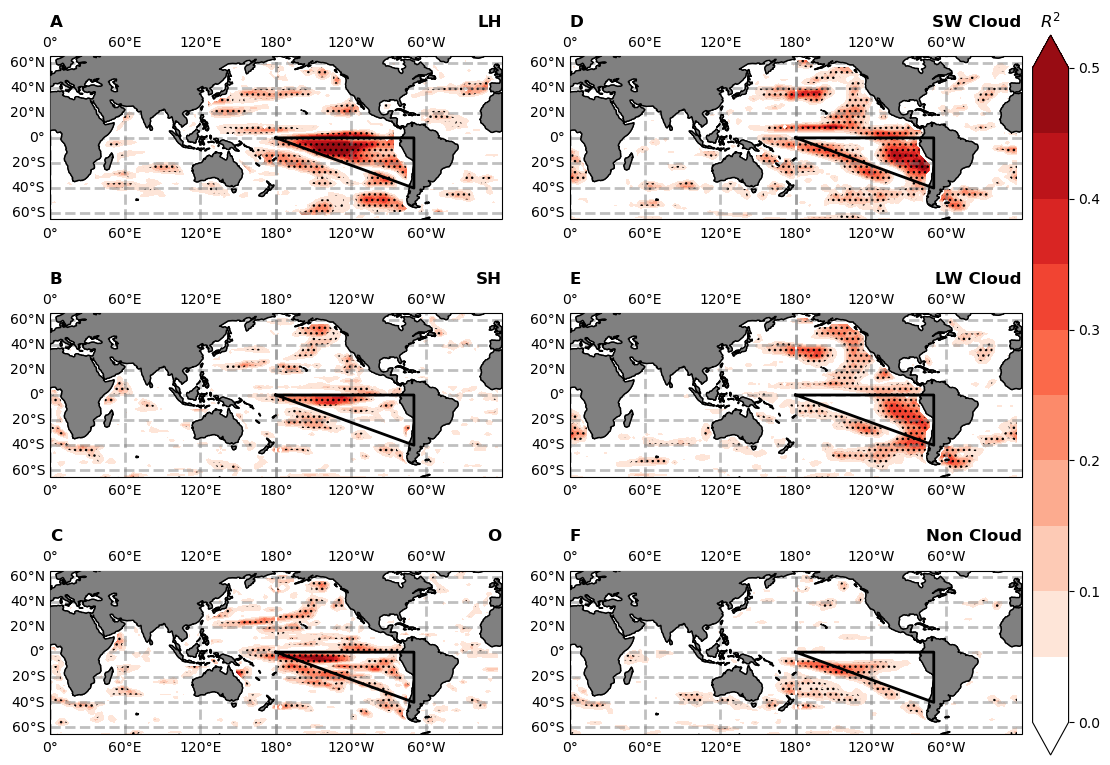

In [28]:
def global_plot(ax, data, lon, lat, cmap, pvalues=None, right_title="", left_title="", levels=np.arange(-4, 4.1, .1), cbar_label: str = ""):
    # Uncomment for reds
    cmap = matplotlib.cm.get_cmap(cmap)
    norm = matplotlib.colors.Normalize(vmin=np.min(levels), vmax=np.max(levels))
    cmap = [cmap(norm(l)) for l in levels]
    cmap[0] = (1, 1, 1, 1) # Set first element to white

    data, pvalues = data[0], data[1]

    # plot map of global data with central longitude 180
    img = ax.contourf(
        lon, lat, data,
        transform=ccrs.PlateCarree(), colors=cmap,
        extend="both",
        levels=levels,
    )
    # add pvalues
    ax.contourf(
        lon, lat, pvalues,
        colors='none',
        levels=[0, .05, 1],
        hatches=['...', None,],
        transform=ccrs.PlateCarree(), 
    )

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

    # Draw triangular region
    lat_min, lat_max = -40, 0
    lon_min, lon_max = -180, -70
    ax.plot(
        [lon_min, lon_max, lon_max, lon_min], 
        [lat_max, lat_max, lat_min, lat_max], 
        color="black", linewidth=2, transform=ccrs.PlateCarree(), zorder=10
    )
    
    ax.add_feature(cartopy.feature.LAND, facecolor="gray", edgecolor="black", zorder=3)

    ax.coastlines()
    ax.set_global()
    ax.set_title(left_title, loc="left", fontweight="bold")
    ax.set_title(right_title, loc="right")
    lon_min, lon_max = -180, 180
    lat_min, lat_max = -65, 65
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    return img

def figure_sx(
    lh, sh, o, swc, lwc, non_cloud 
):
    fig = plt.figure(figsize=(12,8))
    gs = GridSpec(3, 2)
    ax1 = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=180))
    ax2 = fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=180))
    ax3 = fig.add_subplot(gs[2,0], projection=ccrs.PlateCarree(central_longitude=180))
    ax4 = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=180))
    ax5 = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree(central_longitude=180))
    ax6 = fig.add_subplot(gs[2,1], projection=ccrs.PlateCarree(central_longitude=180))
    fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, hspace=.25, wspace=0.15)


    levels = np.arange(0, .55, .05)
    cmap = "Reds"

    # levels = np.arange(-1, 1.1, .10)
    # cmap = "RdBu_r"

    # LH
    img = global_plot(
        ax1,
        data=lh,
        lat=lh[0].lat,
        lon=lh[0].lon,
        levels=levels,
        cmap=cmap, 
        cbar_label="K/30yr"
    )

    # SH
    img = global_plot(
        ax2,
        data=sh,
        lat=sh[0].lat,
        lon=sh[0].lon,
        levels=levels,
        cmap=cmap, 
        cbar_label="K/30yr"
    )
    
    # O
    img = global_plot(
        ax3,
        data=o,
        lat=o[0].lat,
        lon=o[0].lon,
        levels=levels,
        cmap=cmap, 
        cbar_label="K/30yr"
    )
    
    # SWC
    img = global_plot(
        ax4,
        data=swc,
        lat=swc[0].lat,
        lon=swc[0].lon,
        levels=levels,
        cmap=cmap, 
        cbar_label="K/30yr"
    )
    
    # LWC
    img = global_plot(
        ax5,
        data=lwc,
        lat=lwc[0].lat,
        lon=lwc[0].lon,
        levels=levels,
        cmap=cmap, 
        cbar_label="K/30yr"
    )
    
    # NON_CLOUD
    img = global_plot(
        ax6,
        data=non_cloud,
        lat=non_cloud[0].lat,
        lon=non_cloud[0].lon,
        levels=levels,
        cmap=cmap, 
        cbar_label="K/30yr"
    )


    # Set Right Title: Name of Product
    title_fontsize = 12
    ax1.set_title("LH", loc="right", fontweight="bold", fontsize=title_fontsize)
    ax2.set_title("SH", loc="right", fontweight="bold", fontsize=title_fontsize)
    ax3.set_title("O", loc="right", fontweight="bold", fontsize=title_fontsize)
    ax4.set_title("SW Cloud", loc="right", fontweight="bold", fontsize=title_fontsize)
    ax5.set_title("LW Cloud", loc="right", fontweight="bold", fontsize=title_fontsize)
    ax6.set_title("Non Cloud", loc="right", fontweight="bold", fontsize=title_fontsize)

    ax1.set_title("A", loc="left", fontweight="bold", fontsize=title_fontsize)
    ax2.set_title("B", loc="left", fontweight="bold", fontsize=title_fontsize)
    ax3.set_title("C", loc="left", fontweight="bold", fontsize=title_fontsize)
    ax4.set_title("D", loc="left", fontweight="bold", fontsize=title_fontsize)
    ax5.set_title("E", loc="left", fontweight="bold", fontsize=title_fontsize)
    ax6.set_title("F", loc="left", fontweight="bold", fontsize=title_fontsize)

    cbar = fig.colorbar(img, ax=[ax1, ax2, ax3, ax4, ax5, ax6], orientation='vertical', location="right", fraction=.1, pad=0.01)
    cbar.ax.set_title(r"$R^2$", fontsize=12, fontweight="bold")

    plt.savefig(f"manuscript_figures/SI_Figures/Figure_SX_SEB_correlations_1sig.png", dpi=400, bbox_inches='tight')


# figure_sx(
#     lh=[r_maps.sel(concat_dim="lh_other")["net"]**1, p_maps.sel(concat_dim="lh_other")["net"]],
#     sh=[r_maps.sel(concat_dim="sh")["net"]**1, p_maps.sel(concat_dim="sh")["net"]],
#     o=[r_maps.sel(concat_dim="o")["net"]**1, p_maps.sel(concat_dim="o")["net"]],
#     swc=[r_maps.sel(concat_dim="swc")["net"]**1, p_maps.sel(concat_dim="swc")["net"]],
#     lwc=[r_maps.sel(concat_dim="lwc")["net"]**1, p_maps.sel(concat_dim="lwc")["net"]],
#     non_cloud=[r_maps.sel(concat_dim="non_cloud")["net"]**1, p_maps.sel(concat_dim="non_cloud")["net"]],
# )


figure_sx(
    lh=[r_maps_1sig.sel(concat_dim="LH_Other")**2, p_maps_1sig.sel(concat_dim="LH_Other")],
    sh=[r_maps_1sig.sel(concat_dim="SH")**2, p_maps_1sig.sel(concat_dim="SH")],
    o=[r_maps_1sig.sel(concat_dim="O")**2, p_maps_1sig.sel(concat_dim="O")],
    swc=[r_maps_1sig.sel(concat_dim="SWC")**2, p_maps_1sig.sel(concat_dim="SWC")],
    lwc=[r_maps_1sig.sel(concat_dim="LWC")**2, p_maps_1sig.sel(concat_dim="LWC")],
    non_cloud=[r_maps_1sig.sel(concat_dim="NON_CLOUD")**2, p_maps_1sig.sel(concat_dim="NON_CLOUD")],
)
